In [133]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [134]:
df = pd.read_csv(r'C:\Users\rjhcl\Desktop\Census income\census_income.csv')

In [135]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [136]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [138]:
df.isnull().sum()
# no null values

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [139]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [140]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [141]:
df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [142]:
df["Workclass"].replace({'?' : 'Private'}, inplace=True)
df["Occupation"].replace({'?' : 'Prof-specialty'}, inplace=True)
df["Native_country"].replace({'?' : 'United-States'}, inplace=True)

for i in range(len(df)):
    if df['Income'][i] == '<=50K':
        df['Income'][i] = 0
    elif df['Income'][i] == '>=50k':
        df['Income'][i] = 1
    elif df['Income'][i] == '<50k':
        df['Income'][i] = 3
    elif df['Income'][i] == '>50k':
        df['Income'][i] = 4
    else:
        df['Income'][i] = 5
df["Income"] = df["Income"].astype(int)

<ipython-input-142-ec5512ca7876>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Income'][i] = 5


<AxesSubplot:>

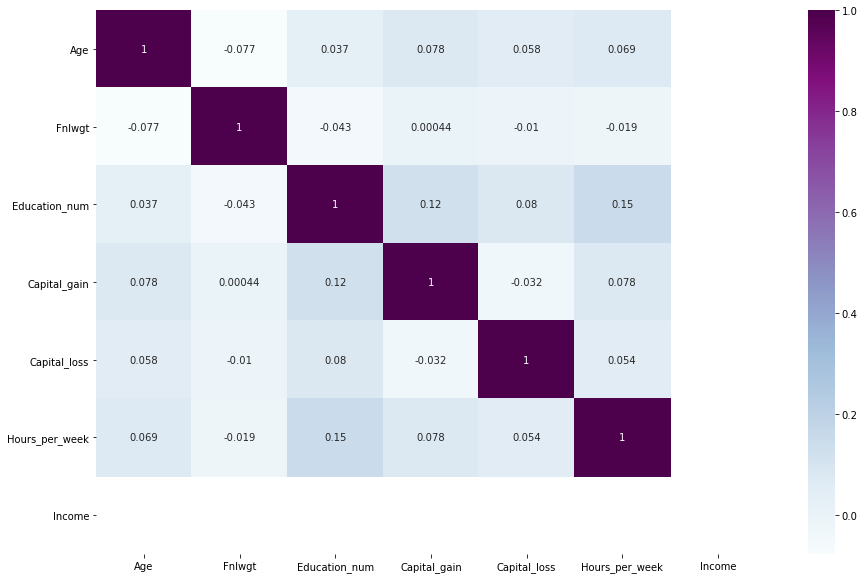

In [143]:
#correlation with heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='BuPu')

In [144]:
df.drop('Fnlwgt',axis=1,inplace=True)

In [145]:
df

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,5
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,5
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,5
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,5
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,5
32556,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,5
32557,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,5
32558,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,5


In [146]:
cat_col = ['Workclass', 'Education' , 'Marital_status' , 'Occupation' , 'Relationship' , 'Race' , 'Sex' , 'Native_country']
le = LabelEncoder()
for col in cat_col:
    df[col] = le.fit_transform(df[col])

In [147]:
df['Occupation'].unique()

array([ 4,  6, 10,  8,  1, 12,  3, 14,  5,  7, 13,  0, 11,  2,  9])

In [148]:
# when we look into the dataset we can find ? marks that are null values so lets fill them up with the most frequently occured value in the column
df['Workclass'].unique()

array([6, 4, 7, 1, 2, 0, 5, 8, 3])

In [149]:
df

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,9,13,2,4,0,4,1,0,0,13,39,5
1,38,4,11,9,0,6,1,4,1,0,0,40,39,5
2,53,4,1,7,2,6,0,2,1,0,0,40,39,5
3,28,4,9,13,2,10,5,2,0,0,0,40,5,5
4,37,4,12,14,2,4,5,4,0,0,0,40,39,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,7,12,2,13,5,4,0,0,0,38,39,5
32556,40,4,11,9,2,7,0,4,1,0,0,40,39,5
32557,58,4,11,9,6,1,4,4,0,0,0,40,39,5
32558,22,4,11,9,4,1,3,4,1,0,0,20,39,5


In [150]:
X = df.drop('Income' , axis=1)
y = df['Income']

In [152]:
kfolds = 10
split = KFold(n_splits=kfolds, shuffle=True, random_state=42)
base_models = [("DecisionTree", DecisionTreeClassifier()),
               ("KNN", KNeighborsClassifier()),
               ("NaiveBayes", GaussianNB()),
               ("RandomForest", RandomForestClassifier()),]
for name, model in base_models:
    print(f"******** {name} ********")
    for score in ["accuracy", "precision", "recall", "f1"]:
        print(f"{score}:", end=" ")
        print(cross_val_score(model, X, y, cv=split, scoring=score, n_jobs=-1).mean())

******** DecisionTree ********
accuracy: 1.0
precision: 0.0
recall: 0.0
f1: 0.0
******** KNN ********
accuracy: 1.0
precision: 0.0
recall: 0.0
f1: 0.0
******** NaiveBayes ********
accuracy: 1.0
precision: 0.0
recall: 0.0
f1: 0.0
******** RandomForest ********
accuracy: 1.0
precision: 0.0
recall: 0.0
f1: 0.0


In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print("**************** Train - Test Split ****************")

DT = DecisionTreeClassifier()
model_1 = DT.fit(X_train, y_train)

# Predictions
pred_1 = model_1.predict(X_test)
print ("**********Decision Tree********")
print ("accuracy: ",accuracy_score(y_test, pred_1))
print("precision: ",precision_score(y_test, pred_1, average="binary"))
print("recall: ",recall_score(y_test, pred_1, average="binary"))
print ("f1: ", f1_score(y_test, pred_1, average = 'binary'))


KNN = KNeighborsClassifier()
model_3 = KNN.fit(X_train, y_train)

# Predictions
pred_3 = model_3.predict(X_test)
print ("********** KNN ********")
print ("accuracy: ",accuracy_score(y_test, pred_3))
print("precision: ",precision_score(y_test, pred_3, average="binary"))
print("recall: ",recall_score(y_test, pred_3, average="binary"))
print ("f1: ", f1_score(y_test, pred_3, average = 'binary'))



NB = GaussianNB()
model_4 = NB.fit(X_train, y_train)

# Predictions
pred_4 = model_4.predict(X_test)
print ("********** Naive Bayes ********")
print ("accuracy: ",accuracy_score(y_test, pred_4))
print("precision: ",precision_score(y_test, pred_4, average="binary"))
print("recall: ",recall_score(y_test, pred_4, average="binary"))
print ("f1: ", f1_score(y_test, pred_4, average = 'binary'))

RF = RandomForestClassifier()
model_6 = RF.fit(X_train, y_train)

# Predictions
pred_6 = model_6.predict(X_test)
print ("********** Random Forest ********")
print ("accuracy: ",accuracy_score(y_test, pred_6))
print("precision: ",precision_score(y_test, pred_6, average="binary"))
print("recall: ",recall_score(y_test, pred_6, average="binary"))
print ("f1: ", f1_score(y_test, pred_6, average = 'binary'))

**************** Train - Test Split ****************
**********Decision Tree********
accuracy:  1.0
precision:  0.0
recall:  0.0
f1:  0.0


C:\Users\rjhcl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rjhcl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rjhcl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1464: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


********** KNN ********
accuracy:  1.0
precision:  0.0
recall:  0.0
f1:  0.0
********** Naive Bayes ********
accuracy:  1.0
precision:  0.0
recall:  0.0
f1:  0.0


C:\Users\rjhcl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rjhcl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rjhcl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1464: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(
C:\Users\rjhcl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to 

********** Random Forest ********
accuracy:  1.0
precision:  0.0
recall:  0.0
f1:  0.0


C:\Users\rjhcl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rjhcl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rjhcl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1464: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


In [ ]:
#Parameter tuning for each
print ("********** Parameter Tuning For Each Algorithm ********")

DT = DecisionTreeClassifier(criterion="entropy", max_depth=15, random_state=0)
print ("**********Decision Tree********")
for score in ["accuracy", "precision", "recall", "f1"]:
    print(f"{score}:", end=" ")
    print(cross_val_score(DT, X, y, cv=split, scoring=score, n_jobs=-1).mean())
    
    
KNN = KNeighborsClassifier(n_neighbors=15)
print ("********** KNN ********")
for score in ["accuracy", "precision", "recall", "f1"]:
    print(f"{score}:", end=" ")
    print(cross_val_score(KNN, X, y, cv=split, scoring=score, n_jobs=-1).mean())
    
    
RF = RandomForestClassifier(criterion = 'entropy',n_estimators=150)
print ("********** Random Forest ********")
for score in ["accuracy", "precision", "recall", "f1"]:
    print(f"{score}:", end=" ")
    print(cross_val_score(RF, X, y, cv=split, scoring=score, n_jobs=-1).mean())

********** Parameter Tuning For Each Algorithm ********
**********Decision Tree********
accuracy: 1.0
precision: 0.0
recall: 0.0
f1: 0.0
********** KNN ********
accuracy: 1.0
precision: 

In [ ]:
# lets use random forest classifier
pred = RF

In [ ]:
joblib.dump(pred_rf,"plant_FuelType_prediction.pkl")